# **PEMANFAATAN MACHINE LEARNING UNTUK MENGESTIMASI HARGA MOBIL BEKAS TOYOTA MENGGUNAKAN MODEL REGRESI LINIER**

#**Disusun Oleh:**
<br>Nama: Aenur Hakim Maulia
<br>NIM: A11.2022.14639
<br>Kelompok: Pembelajaran Mesin A11.4410

# **Ringkasan**

Penelitian ini bertujuan untuk mengembangkan sebuah model
Machine Learning yang dapat memprediksi harga mobil bekas dengan
menggunakan data historis tentang penjualan mobil bekas Toyota dan fitur-fitur
seperti model mobil, tahun pembuatan, kondisi mobil, jumlah kilometer yang
telah ditempuh, dan fitur lainnya, model ini diharapkan dapat memberikan
perkiraan harga yang lebih objektif dan akurat. Dengan memahami nilai estimasi
yang tepat untuk mobil bekas Toyota, pembeli dapat membuat keputusan yang
lebih informatif dan penjual dapat menetapkan harga yang lebih adil. Selain itu,
pengembangan model ini juga dapat memberikan wawasan berharga bagi industri
otomotif dalam memahami tren harga mobil bekas dan faktor-faktor yang
mempengaruhinya.


# **Masalah**

Membeli mobil bekas merupakan sebuah alternatif jika kita ingin
memiliki mobil dengan harga terjangkau, namun seringkali terjadi terjadi
ketidakakuratan antara harga dengan kondisi mobil. Dari permasalahan tersebut, kita akan mencari solusi untuk dapat mengestimasi harga mobil bekas toyota secara tepat dan akurat
baik bagi penjual maupun pembeli agar tidak terjadi kekeliruan.

# **Alur Penyelesaian**

Berikut merupakan alur peneyelesaian dari project ini

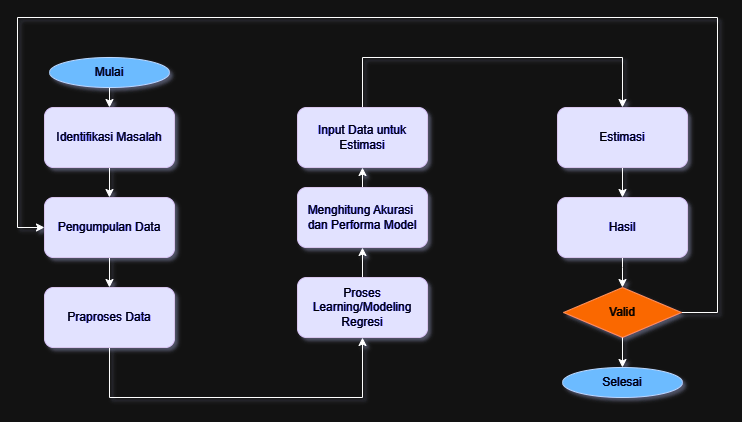

# **Mengimport Library**

Library yang digunakan dalam pengolahan data set ini yaitu:


*   pandas = untuk pembacaan data dan mengubah ke dataframe.
*   numpy = untuk mengubah data menjadi array dan
 memudahkan dalam mengkonfigurasi.
*   matplotlib = untuk visualisasi data.
*   LinearRegression = kelas dalam library scikit-learn yang digunakan untuk membangun model regresi linear.
*   train_test_split = fungsi dalam library scikit-learn yang digunakan untuk membagi dataset menjadi dua subset: satu untuk pelatihan (training) dan satu untuk pengujian (testing).
*   mean_absolute_error = metrik evaluasi dalam scikit-learn yang mengukur rata-rata absolut dari kesalahan antara nilai yang diprediksi oleh model dan nilai aktual. Semakin kecil nilai MAE, semakin baik performa model.
*   mean_squad_error = metrik evaluasi dalam scikit-learn yang mengukur rata-rata kuadrat dari kesalahan antara nilai yang diprediksi oleh model dan nilai aktual. MSE memberikan penalti yang lebih besar untuk kesalahan yang lebih besar.
*   r2_score = metrik evaluasi dalam scikit-learn yang mengukur seberapa baik model memprediksi nilai aktual. Nilai R² berkisar antara 0 dan 1, di mana 1 menunjukkan model yang sempurna.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

# **Penjelasan Dataset**

Dataset ini merupakan kumpulan data penjualan mobil bekas
bermerek Toyota dari negara Eropa yang didapat dari website Kaggle. Dalam
dataset ini terdapat beberap fitur atau kolom seperti, model, year(tahun
pembuatan), price(harga), transmission(jenis transmisi),mileage(jarak tempuh),
fuelType(jenis bahan bakar), tax(pajak), mpg(konsumsi bahan bakar), serta
engineSize(ukuran mesin) serta memiliki 6739 kolom. Dataset ini memiliki nama
toyota.csv, bekstensi CSV (Comma Delimited) dan untuk sumber dari dataset ini
bersifat public dataset.

# **Exploratory Data Analysis (EDA)**



Tahap Exploratory Data Analysis yang pertama adalah membaca dataset dari sumber data (toyota.csv) ke dalam DataFrame menggunakan pandas.



In [ ]:
df = pd.read_csv('toyota.csv')

# **Menampilkan 5 baris pertama dataset**

Untuk menampilkan 5 baris pertama dataset kita bisa menggunakan perintah:

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


# **Melihat Detail Info Dataset**

Untuk melihat detail info dari dataset kita bisa menggunakan perintah:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


# **Mengecek Nilai Null**

Memeriksa apakah ada nilai yang hilang(null) dalam dataset sekaligus memvisualisasikan dengan heatmap.
<br>Dari heatmap berikut dapat menunjukkan bahwa tidak ada missing data pada dataset ini.

<Axes: >

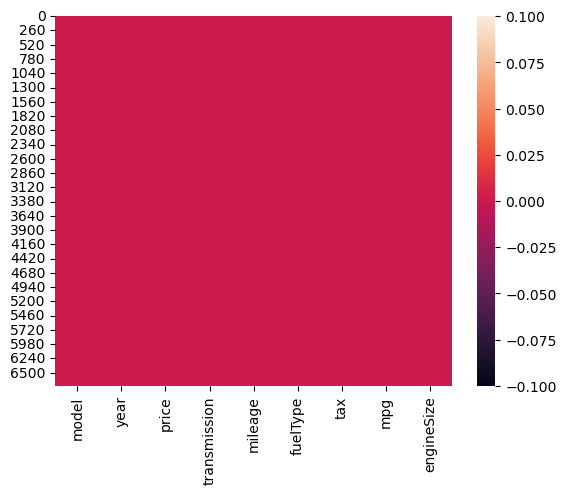

In [ ]:
sns.heatmap(df.isnull())

# **Melihat nilai rata-rata dataset**

Untuk melihat rata-rata dataset kita dapat menggunakan perintah:

In [ ]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


# **Melihat Data Numerik**

Dari visualisasi berikut ditampilkan atribut-atribut yang menggunakan tipe
data numerik yang nantinya akan kita seleksi untuk analisis estimasi ini.
Untuk melihat data numerik, kita dapat mengetikkan perintah:

<Axes: >

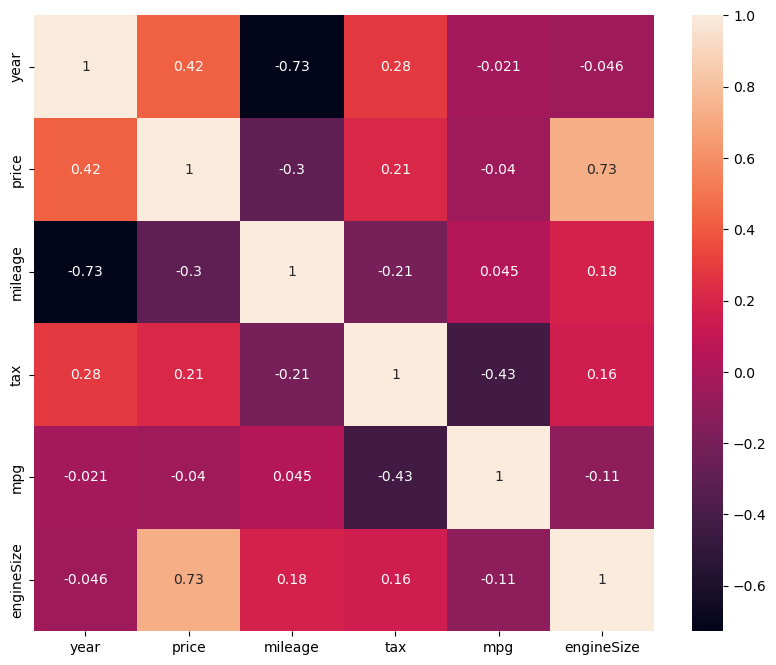

In [ ]:
df = df.select_dtypes(exclude=[object])
df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# **Melihat Jumlah Mobil Berdasarkan Model/Nama**

In [ ]:
models = df.groupby('model').count()[['tax']].sort_values(by='tax',ascending=True).reset_index()
models = models.rename(columns={'tax':'numberOfCars'})

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ' Verso-S'),
  Text(1, 0, ' Urban Cruiser'),
  Text(2, 0, ' IQ'),
  Text(3, 0, ' Camry'),
  Text(4, 0, ' Supra'),
  Text(5, 0, ' PROACE VERSO'),
  Text(6, 0, ' Land Cruiser'),
  Text(7, 0, ' GT86'),
  Text(8, 0, ' Hilux'),
  Text(9, 0, ' Verso'),
  Text(10, 0, ' Avensis'),
  Text(11, 0, ' Prius'),
  Text(12, 0, ' Corolla'),
  Text(13, 0, ' RAV4'),
  Text(14, 0, ' C-HR'),
  Text(15, 0, ' Auris'),
  Text(16, 0, ' Aygo'),
  Text(17, 0, ' Yaris')])

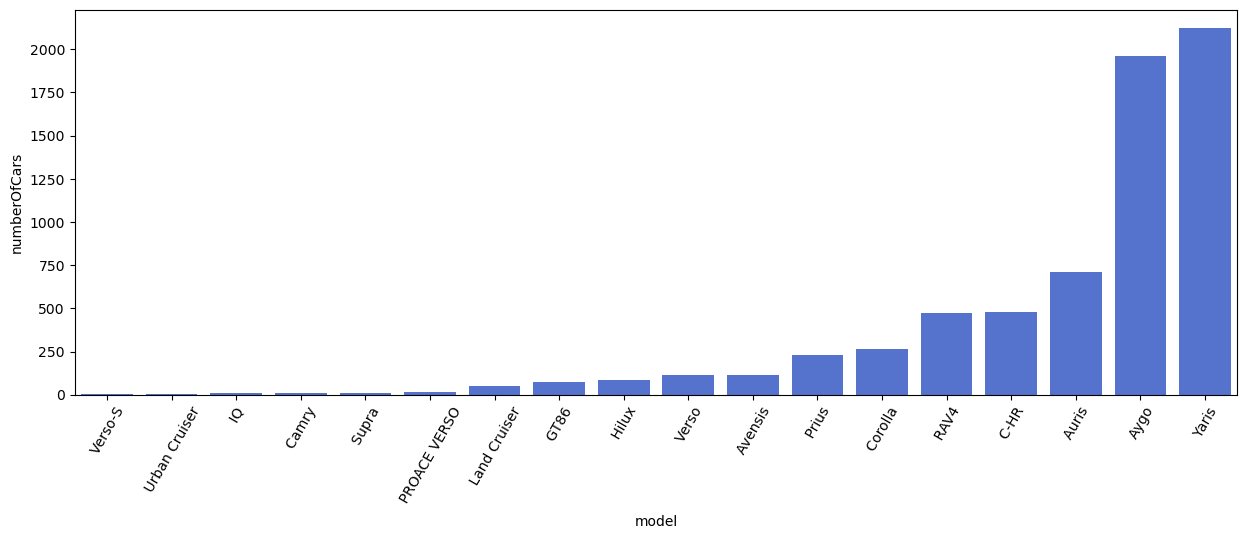

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['numberOfCars'], color='royalblue')
plt.xticks(rotation=60)

# **Melihat Jumlah Mobil Berdasarkan Ukuran Mesin**

In [ ]:
engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax').reset_index()
engine = engine.rename(columns={'tax':'count'})

<Axes: xlabel='engineSize', ylabel='count'>

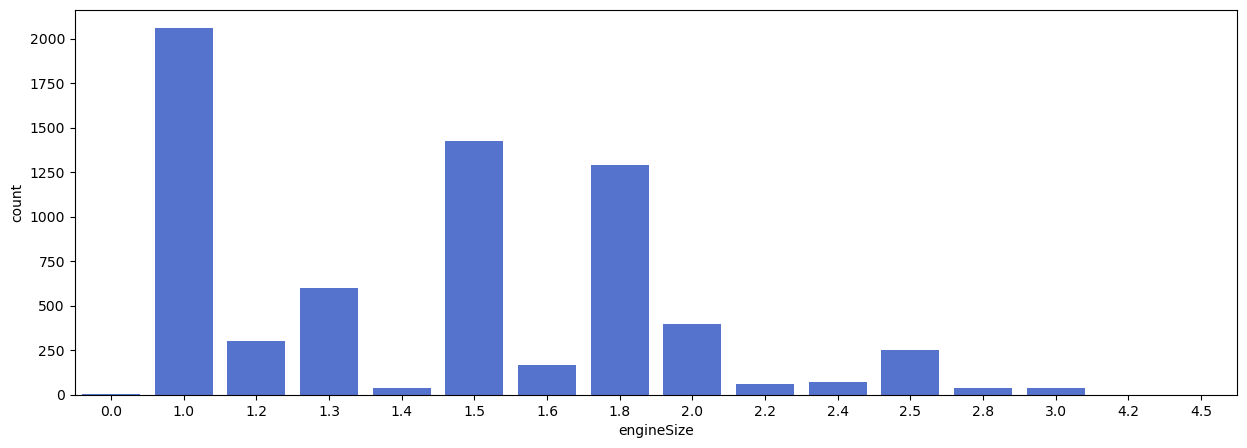

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'], y=engine['count'], color='royalblue')

# **Melihat Jumlah Mobil Berdasarkan Mileage(Jarak Tempuh)**

C:\Users\HP\AppData\Local\Temp\ipykernel_6860\4199392006.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mileage'])


<Axes: xlabel='mileage', ylabel='Density'>

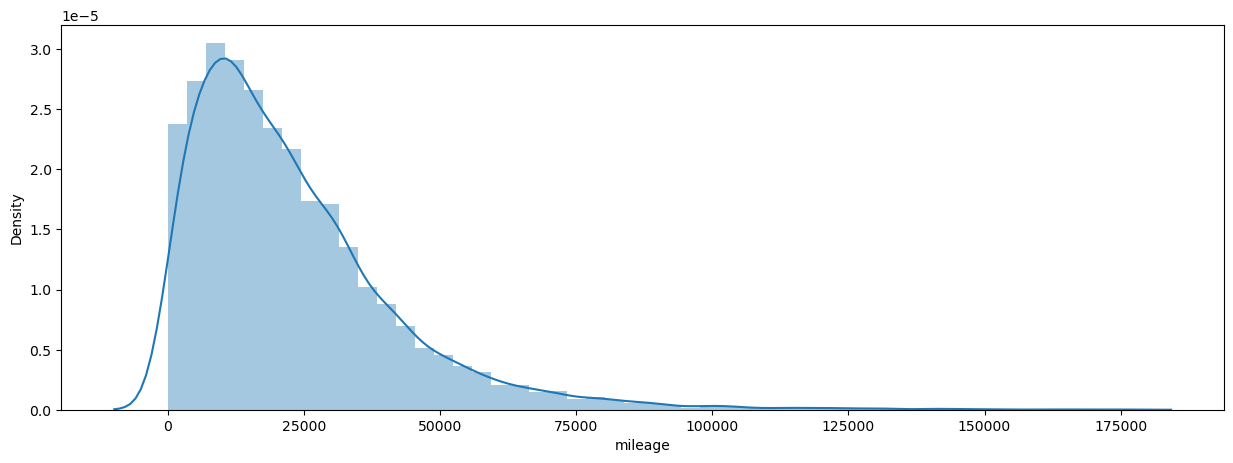

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(df['mileage'])

# **Distribusi Harga Mobil**

C:\Users\HP\AppData\Local\Temp\ipykernel_6860\236377283.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

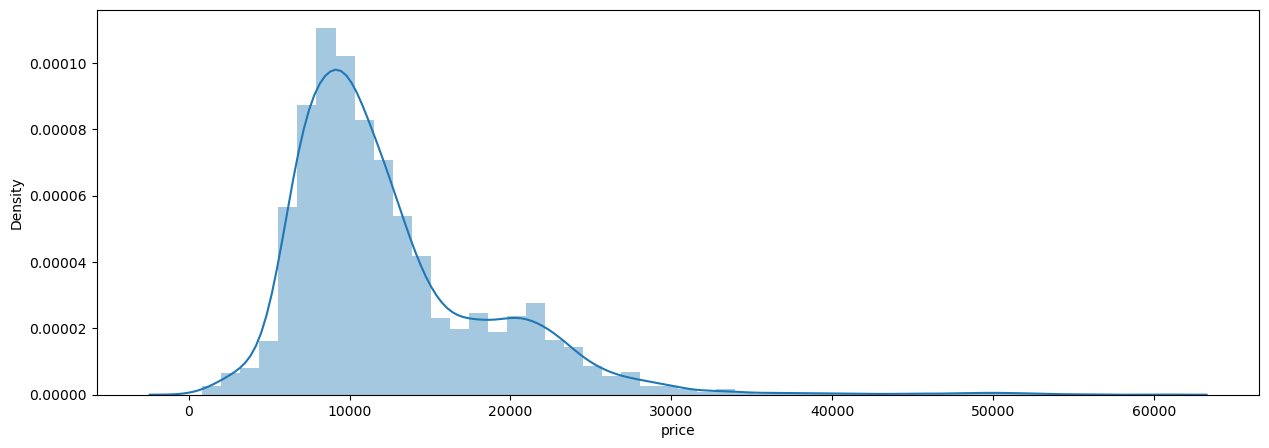

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(df['price'])

# **Melihat Perbandingan Harga Mobil Asli VS Prediksi/Estimasi**

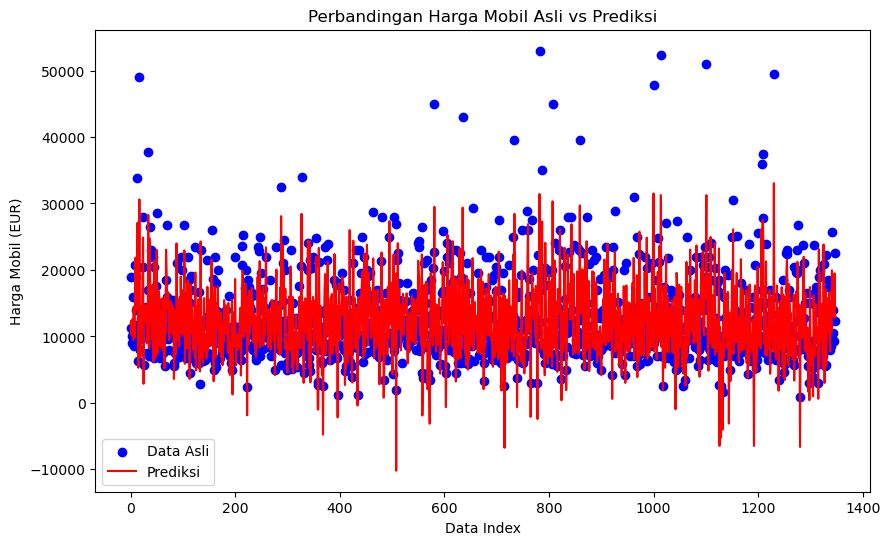

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Data Asli')
plt.plot(range(len(y_pred)), y_pred, color='red', label='Prediksi')
plt.xlabel('Data Index')
plt.ylabel('Harga Mobil (EUR)')
plt.title('Perbandingan Harga Mobil Asli vs Prediksi')
plt.legend()
plt.show()

# **Seleksi Fitur**

Pada seleksi fitur ini kita akan menyeleksi fitur-fitur yang memiliki tipe data
numerik saja yang jumlahnya sebanyak 6738 data

In [ ]:
features = ['year','mileage','tax','mpg','engineSize']
x = df[features]
y= df['price']
x.shape, y.shape

((6738, 5), (6738,))

# **Spliting data training dan data testing**

Dari total 6738 data, setelah displit maka akan menghasilkan data testing
sebanyak 1685 data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(1685,)

# **Proses Learning/Modeling**

Model yang akan kita buat dan yang akan kita gunakan adalah Linear Regression yang termasuk dalam Supervised Learning

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

# **Mengukur Akurasi Model**

Scoring model training dilakukan untuk menguji dan mengetahui akurasi
dari model training ini.
<br>Setelah dijalankan, maka kita akan menghasilkan akurasi model regresi
linier sebesar = 0.7678983314475207 atau 76%, score sudah cukup untuk
sebuah akurasi model

In [ ]:
score = lr.score(x_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.7678983314475207


# **Mengukur Performa Model**

Metrik yang digunakan dalam mengukur performa dari model ini yaitu MAE, MSE, dan R^2

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['year','mileage','tax','mpg','engineSize']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 2205.438233189111


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 10461784.511804912


In [ ]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

R-squared (R²): 0.7494075450651388


Dari pengukuran performa model di atas dapat diketahui bahwa


*   MAE: 2205,438233189111
*   MSE: 10461784.511804912
*   R^2: 0,7494075450651388


# **Diskusi Hasil**

Pada tahap diskusi hasil ini kita akan memulai estimasi dengan cara membuat
sebuah inputan data dari model Linear Regression terlebih dahulu.
Kita akan input data dengan format konstruktor('year','mileage','tax','mpg','engineSize')


# **Estimasi Pertama**


Dari inputan data mobil dengan rincian
<br>Tahun(year) : 2019
<br>Jarak tempuh(mileage) : 5000
<br>Pajak(tax) : €144 (EUR)
<br>Konsumsi bahan bakar(mpg) : 30,2
<br>Ukuran mesin(EngineSize) : 2 (2000cc)
<br>Maka estimasi harga dari mobil bekas tersebut adalah
€21070.7505487 (EUR)


In [ ]:
input_data = np.array([[2019,5000,144,30.2,2]])

prediction = lr.predict(input_data)
print('Estimasi harga mobil dalam EUR : ', prediction)

Estimasi harga mobil dalam EUR :  [21070.7505487]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **Estimasi Kedua**

Dari inputan data mobil dengan rincian
<br>Tahun(year) : 2015
<br>Jarak tempuh(mileage) : 6500
<br>Pajak(tax) : €145 (EUR)
<br>Konsumsi bahan bakar(mpg) : 36,2
<br>Ukuran mesin(EngineSize) : 2 (2000cc)
<br>Maka estimasi harga dari mobil bekas tersebut adalah
€17910.03549498 (EUR)


In [ ]:
input_data = np.array([[2015,6500,145,36.2,2]])

prediction = lr.predict(input_data)
print('Estimasi harga mobil dalam EUR : ', prediction)

Estimasi harga mobil dalam EUR :  [17910.03549498]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **Estimasi Ketiga**

Dari inputan data mobil dengan rincian
<br>Tahun(year) : 2017
<br>Jarak tempuh(mileage) : 45000
<br>Pajak(tax) : €265 (EUR)
<br>Konsumsi bahan bakar(mpg) : 30,2
<br>Ukuran mesin(EngineSize) : 2 (2000cc)
<br>Maka estimasi harga dari mobil bekas tersebut adalah
€16233.73158394 (EUR)


In [ ]:
input_data = np.array([[2017,45000,265,30.2,2]])

prediction = lr.predict(input_data)
print('Estimasi harga mobil dalam EUR : ', prediction)

Estimasi harga mobil dalam EUR :  [16233.73158394]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **Estimasi Keempat**

Dari inputan data mobil dengan rincian
<br>Tahun(year) : 2016
<br>Jarak tempuh(mileage) : 87000
<br>Pajak(tax) : €155 (EUR)
<br>Konsumsi bahan bakar(mpg) : 38,2
<br>Ukuran mesin(EngineSize) : 2 (2000cc)
<br>Maka estimasi harga dari mobil bekas tersebut adalah
€12358.83985824 (EUR)


In [ ]:
input_data = np.array([[2016,87000,155,38.2,2]])

prediction = lr.predict(input_data)
print('Estimasi harga mobil dalam EUR : ', prediction)

Estimasi harga mobil dalam EUR :  [12358.83985824]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **Estimasi Kelima**

Dari inputan data mobil dengan rincian
<br>Tahun(year) : 2018
<br>Jarak tempuh(mileage) : 47000
<br>Pajak(tax) : €125 (EUR)
<br>Konsumsi bahan bakar(mpg) : 21,2
<br>Ukuran mesin(EngineSize) : 2 (2000cc)
<br>Maka estimasi harga dari mobil bekas tersebut adalah
€16805.17350606 (EUR)


In [ ]:
input_data = np.array([[2018,47000,125,21.2,2]])

prediction = lr.predict(input_data)
print('Estimasi harga mobil dalam EUR : ', prediction)

Estimasi harga mobil dalam EUR :  [16805.17350606]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **Kesimpulan**

Model untuk memprediksi harga mobil bekas Toyota yang dikembangkan dalam penelitian ini menunjukkan kinerja yang cukup baik. Evaluasi akurasi sebesar 0.7678983314475207, serta performa model memberikan hasil Mean Absolute Error (MAE) sebesar 2205.44, Mean Squared Error (MSE) sebesar 10461784.51, dan nilai R-squared (R²) sebesar 0.7494. Nilai R² ini menunjukkan bahwa  ini mampu menjelaskan sekitar 74.94% variabilitas dalam data, yang mengindikasikan tingkat akurasi prediksi yang cukup tinggi. Model ini menggunakan fitur-fitur seperti tahun pembuatan, jarak tempuh, pajak, konsumsi bahan bakar, dan ukuran mesin untuk memberikan estimasi harga yang lebih objektif. Dengan performa yang dicapai, model ini dapat membantu pembeli dan penjual dalam menentukan harga yang lebih adil dan informatif, serta memberikan wawasan berharga bagi industri otomotif dalam memahami tren harga mobil bekas dan faktor-faktor yang mempengaruhinya.

Model ini memiliki potensi
untuk memberikan kontribusi dalam industri otomotif dengan menyediakan alat
yang dapat membantu pembeli dan penjual dalam menentukan harga mobil, tidak hanya untuk mobil bekas Toyota saja, namun penelitian ini juga
dapat menjadi dasar bagi pengembangan model serupa untuk merek mobil lainnya
dalam industri otomotif.
